In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Define original and extended function

In [2]:
def gfun(x): return -np.exp(x-2) + 1

def gfun_extended(x, lowers, uppers, rfac=1e-3):
    
    _dx_l, _dx_u = lowers - x, x - uppers
    _ll, _uu = (_dx_l > 0)*_dx_l, (_dx_u > 0)*_dx_u
    
    _x = x + _ll - _uu
    _g_factor = 1. + rfac * (_ll + _uu)
    
    _g = gfun(x)
    
    return _g * _g_factor

#### Configure limits and grid

In [3]:
lower, upper = -1, 2.5
x_arr = np.linspace(lower-3, upper+1.2, 51)

#### Evalute original and extended function values

In [4]:
g_arr = gfun(x_arr)

In [5]:
rfac_list = [1e0, 1e-1, 1e-2]
g_extended_arr_list = [gfun_extended(x_arr, lower, upper, rfac) for rfac in rfac_list]

#### Visualize

(Text(0.5, 0, 'x'), Text(0, 0.5, 'objective function f(x) to be zero'))

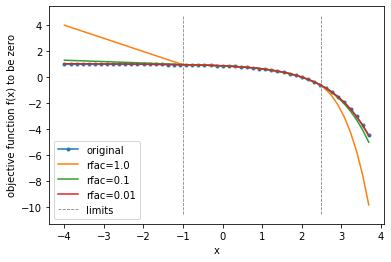

In [6]:
fig, ax = plt.subplots()
ax.plot(x_arr, g_arr, '.-', label='original')
for rfac, g_extended_arr in zip(rfac_list, g_extended_arr_list):
    ax.plot(x_arr, g_extended_arr, label='rfac={}'.format(rfac))
ax.vlines([lower, upper], *ax.get_ylim(), 
          linestyle='--', linewidth=0.8, color='gray', label='limits')
ax.legend()
ax.set_xlabel("x"), ax.set_ylabel("objective function f(x) to be zero")